In [6]:
#Las Siguientes lineas no requieren de ninguna modificación, 
#son las librerias necesarias para el funcionamiento de la libreta
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
import matplotlib.colors as colors
from pylab import * 
output_notebook()

#archivo1='../Thingsboard/filtrados.csv'
archivo1='../Thingsboard/marzo_2020.csv'

columnas  = ['ts','T1','T2','T3','T4','T5','T6','T7','A1','A2','A3','A4','A5','A6','A7']
def importa(archivo,columnas):
    
    tmp = pd.read_csv(archivo,header=None,sep=',',names = columnas,skiprows=2)
    #tmp = pd.read_csv(archivo,header=None,sep=',',names = columnas,skiprows=200)
    tmp=tmp.set_index('ts')
    tmp=tmp.dropna()
    return tmp


Loading BokehJS ...

In [20]:
datos=importa(archivo1,columnas)
datos.index=pd.to_datetime(datos.index,format='%d/%m/%Y  %H:%M')
#adquisidor=importa(archivo2,columnas)
#adquisidor.index=pd.to_datetime(adquisidor.index,format='%d/%m/%Y  %H:%M')
values = [85, 100,-127]
datos
##a veces estaremos interesados en una ventana especifica de tiempo por lo que estas lineas nos 
#permiten elegir fecha y hora inicial y final de los datos que deseamos guardar, es necesario respetar
# el formato completo para evitar problemas : 'YYYY-MONTH-DD HH:MM:SS' ejemplo: fecha1 = '2020-March-23 16:30:00'
#fecha1 = '2020-03-22 16:30:00'
#fecha2 = '2020-03-23 12:30:00'
#datos[fecha1:fecha2]


#datos=datos[fecha1:fecha2]
#datos.to_csv('filtrados.csv')

,T1,T2,T3,T4,T5,T6,T7,A1,A2,A3,A4,A5,A6,A7
ts,,,,,,,,,,,,,,
2020-03-23 12:29:00,-127,21.6250,22.8125,22.8125,85.0,22.75,22.6875,22.0,22.1,22.1,22.1,22.0,20.8,20.8
2020-03-23 12:28:00,-127,21.6250,22.8125,22.8125,85.0,22.75,22.6875,22.1,22.2,22.2,22.2,22.2,21.0,21.0
2020-03-23 12:27:00,-127,85.0000,22.8125,22.8125,85.0,22.75,22.6875,22.2,22.3,22.3,22.4,22.3,21.1,21.1
2020-03-23 12:25:00,-127,21.5625,22.8750,22.8125,85.0,22.75,22.6875,22.3,22.4,22.4,22.4,22.4,21.1,21.2
2020-03-23 12:24:00,-127,21.6250,22.8750,22.8125,85.0,22.75,22.6875,22.3,22.4,22.5,22.5,22.5,21.2,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-22 16:34:00,-127,85.0000,22.8750,22.8750,85.0,22.75,22.6875,22.4,22.6,22.6,22.7,22.6,21.3,21.2
2020-03-22 16:33:00,-127,85.0000,22.8750,22.8125,85.0,22.75,22.6875,22.5,22.6,22.6,22.7,22.7,21.3,21.2
2020-03-22 16:32:00,-127,85.0000,22.8750,22.8125,85.0,22.75,22.6875,22.4,22.5,22.5,22.7,22.6,21.3,21.2


In [36]:
#solo se eliminan 4 datos
values = [85, 100,-127]
datos=datos[datos.T3.isin(values) == False]
print(len(datos))
datos=datos[datos.T4.isin(values) == False]
print(len(datos))
#datos=datos[datos.T5.isin(values) == False]
print(len(datos))
datos=datos[datos.T6.isin(values) == False]
print(len(datos))
datos=datos[datos.T7.isin(values) == False]
print(len(datos))


1154
1154
1154
1154
1154


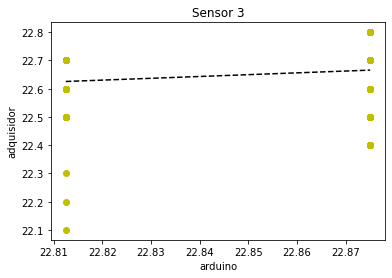

m: 0.6438113652160333 b: 7.938686142401678


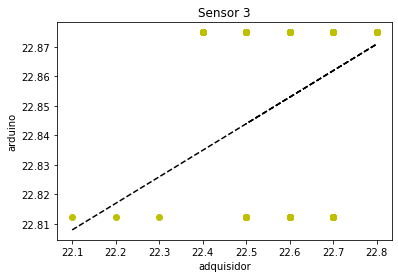

m: 0.08991995862902889 b: 20.820762198951716


In [42]:

m,b = polyfit(datos.T3, datos.A3, 1) 

plot(datos.T3, datos.A3, 'yo', datos.T3, m*datos.T3+b, '--k') 

plt.title('Sensor 3')
plt.xlabel('arduino')
plt.ylabel('adquisidor')
show() 
print('m:',m,'b:',b)


m,b = polyfit(datos.A3, datos.T3, 1)
plot(datos.A3, datos.T3, 'yo', datos.A3, m*datos.A3+b, '--k',) 
plt.title('Sensor 3')
plt.ylabel('arduino')
plt.xlabel('adquisidor')
show() 
print('m:',m,'b:',b)


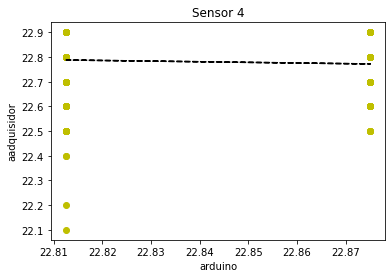

m: -0.2553688544226076 b: 28.613279716634235


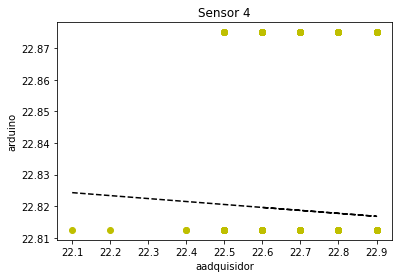

m: -0.009361970742614849 b: 23.031186538531518


In [43]:
m,b = polyfit(datos.T4, datos.A4, 1) 

plot(datos.T4, datos.A4, 'yo', datos.T4, m*datos.T4+b, '--k') 

plt.title('Sensor 4')
plt.xlabel('arduino')
plt.ylabel('aadquisidor')
show() 
print('m:',m,'b:',b)


m,b = polyfit(datos.A4, datos.T4, 1)
plot(datos.A4, datos.T4, 'yo', datos.A4, m*datos.A4+b, '--k',) 
plt.title('Sensor 4')
plt.ylabel('arduino')
plt.xlabel('aadquisidor')
show() 
print('m:',m,'b:',b)

m: 0.07581974968806514 b: 19.69196064107288


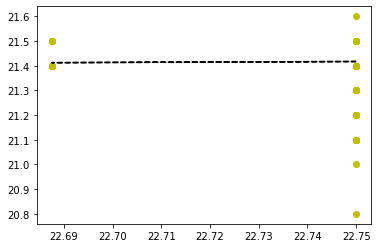

m: 0.0011266055251997291 b: 22.7240845382195


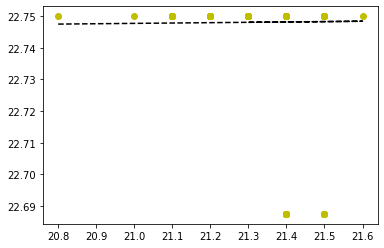

In [28]:
m,b = polyfit(datos.T6, datos.A6, 1) 

plot(datos.T6, datos.A6, 'yo', datos.T6, m*datos.T6+b, '--k') 
print('m:',m,'b:',b)
show() 

m,b = polyfit(datos.A6, datos.T6, 1) 

plot(datos.A6, datos.T6, 'yo', datos.A6, m*datos.A6+b, '--k') 
print('m:',m,'b:',b)
show() 

m: 0.47046389774225617 b: 10.65949263133838


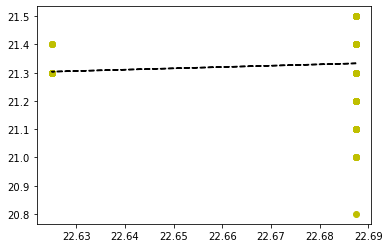

m: 0.021644984666255807 b: 22.220008413296995


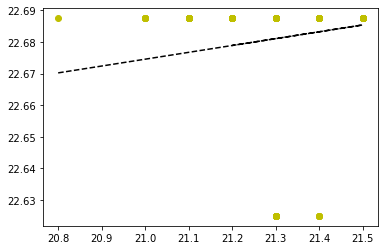

In [29]:
m,b = polyfit(datos.T7, datos.A7, 1) 

plot(datos.T7, datos.A7, 'yo', datos.T7, m*datos.T7+b, '--k') 
print('m:',m,'b:',b)
show() 

m,b = polyfit(datos.A7, datos.T7, 1) 

plot(datos.A7, datos.T7, 'yo', datos.A7, m*datos.A7+b, '--k') 
print('m:',m,'b:',b)
show() 

In [ ]:
#Estas lineas nos permiten importar todos los datos que se enviaron bajo una misma etiqueta
#se pueden estipular los nombres que se vean mas convenientes para las variables pero se recomienda
#continuar con el formato de ejemplo para no requerir mayor edición mas adelante
A01 = datos.T1
A02 = datos.T2
A03 = datos.T3
A04 = datos.T4
A05 = datos.T5
A06 = datos.T6
A07 = datos.T7

AD01 = datos.A1
AD02 = datos.A2
AD03 = datos.A3
AD04 = datos.A4
AD05 = datos.A5
AD06 = datos.A6
AD07 = datos.A7


#las siguientes lineas crean una grafica con los datos importados anteriormente y respetando las fechas
#solicitadas,  para cambiar las fechas es necesario volver a correr todas las celdas
import matplotlib.colors as colors
colores = list(colors._colors_full_map.values())


In [ ]:
#datos_og=len(A01)
#A01= A01[A01.isin(values) == False]
#datos_dep=len(A01)
#borrados=datos_og-datos_dep
#print('datos borrados:',borrados,'de ',datos_og,'datos totales del prototipo')
p = figure(title="Temperaturas Sensor 1", x_axis_label='Adquisidor', y_axis_label='prototipo [\xb0 C]')
p.scatter(x=AD03,y=A03,color=colores[8],legend_label='S3')
#p.scatter(x=A01.index,y=A01,color=colores[9],legend_label='Prototipo')
#p.legend.location = "bottom_right"
show(p)

In [ ]:
datos_og=len(A02)
A02= A02[A02.isin(values) == False]
datos_dep=len(A02)
borrados=datos_og-datos_dep
print('datos borrados:',borrados,'de ',datos_og,'datos totales del prototipo')
p = figure(title="Temperaturas Sensor 2", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=AD02.index,y=AD02,color=colores[8],legend_label='Adquisidor')
p.scatter(x=A02.index,y=A02,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)


In [ ]:
datos_og=len(A03)
#A03= A03[A03.isin(values) == False]
datos_dep=len(A03)
borrados=datos_og-datos_dep
print('datos borrados:',borrados,'de ',datos_og,'datos totales del prototipo')
p = figure(title="Temperaturas Sensor 3", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=AD03.index,y=A03,color=colores[8],legend_label='Adquisidor')
#p.scatter(x=A03.index,y=A03,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)

In [ ]:
datos_originales=len(A03)
#A03= A03[A03.isin(values) == False]
datos_depurados=len(A03)
print('datos borrados:',datos_originales-datos_depurados)
p = figure(title="Temperaturas Sensor 3", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=AD03.index,y=A03,color=colores[8],legend_label='Adquisidor')
p.scatter(x=A03.index,y=A03,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)

In [ ]:
datos_og=len(A04)
#A04= A04[A04.isin(values) == False]
datos_dep=len(A04)
borrados=datos_og-datos_dep
print('datos borrados:',borrados,'de ',datos_og,'datos totales del prototipo')
p = figure(title="Temperaturas Sensor 4", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=AD04.index,y=AD04,color=colores[8],legend_label='Adquisidor')
p.scatter(x=A04.index,y=A04,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)

In [ ]:
datos_og=len(A05)
A05= A05[A05.isin(values) == False]
datos_dep=len(A05)
borrados=datos_og-datos_dep
print('datos borrados:',borrados,'de ',datos_og,'datos totales del prototipo')
p = figure(title="Temperaturas Sensor 5", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=AD05.index,y=AD05,color=colores[8],legend_label='Adquisidor')
p.scatter(x=A05.index,y=A05,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)

In [ ]:
datos_og=len(A06)
A06= A06[A06.isin(values) == False]
datos_dep=len(A06)
borrados=datos_og-datos_dep
print('datos borrados:',borrados,'de ',datos_og,'datos totales del prototipo')
p = figure(title="Temperaturas Sensor 6", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=AD06.index,y=AD06,color=colores[8],legend_label='Adquisidor')
p.scatter(x=A06.index,y=A06,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)

In [ ]:
datos_og=len(A07)
A07= A07[A07.isin(values) == False]
datos_dep=len(A07)
borrados=datos_og-datos_dep
print('datos borrados:',borrados,'de ',datos_og,'datos totales del prototipo')
p = figure(title="Temperaturas Sensor 7", x_axis_label='tiempo', y_axis_label='Temperatura [\xb0 C]',x_axis_type='datetime')
p.scatter(x=AD07.index,y=AD07,color=colores[8],legend_label='Adquisidor')
p.scatter(x=A07.index,y=A07,color=colores[9],legend_label='Prototipo')
p.legend.location = "bottom_right"
show(p)

In [ ]:
dif01=A01-AD01
dif02=A02-AD02
dif03=A03-AD03
dif04=A04-AD04
dif05=A05-AD05
dif06=A06-AD06
dif07=A07-AD07

In [ ]:
plt.plot(dif03)
plt.plot(dif04)
plt.plot(dif06)
plt.plot(dif07)

In [ ]:
fig, ax=plt.subplots(2,2,figsize=(8,8),sharey=True)

fig.tight_layout(h_pad=4, w_pad=4)
ax[0,0].plot(dif03)
ax[0,1].plot(dif04)
ax[1,0].plot(dif06)
ax[1,1].plot(dif07)

ax[0, 0].set_title("S_1")
ax[0, 1].set_title("S_2")
ax[1, 0].set_title("S_3")
ax[1, 1].set_title("S_4")


ax[0, 0].set_ylabel('Temperatura [°C]')
ax[0, 1].set_ylabel('Temperatura [°C]')
ax[1, 0].set_ylabel('Temperatura [°C]')
ax[1, 1].set_ylabel('Temperatura [°C]')

ax[0, 0].set_xlabel('Tiempo')
ax[0, 1].set_xlabel('Tiempo')
ax[1, 0].set_xlabel('Tiempo')
ax[1, 1].set_xlabel('Tiempo')

In [ ]:
plt.lot

In [ ]:
print(abs(dif03).mean())
print(dif03.mean())


In [ ]:
print(abs(dif04).mean())
print(dif04.mean())

In [ ]:
print(abs(datos.T3-datos.A3).mean())
print(abs(datos.T3-datos.A3).std())

In [ ]:
print(abs(datos.T4-datos.A4).mean())
print(abs(datos.T4-datos.A4).std())